In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

df=pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


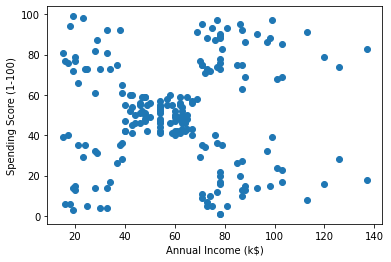

In [2]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [3]:
#sutun isimleri kısaltalım
df.rename(columns={"Annual Income (k$)":"income"},inplace=True)
df.rename(columns={"Spending Score (1-100)":"score"},inplace=True)

In [4]:
#normalizasyon yapıyoruz.yani degerleri  0 ile 1 arası yapıyoruz.
scaler=MinMaxScaler()

scaler.fit(df[["income"]])
df["income"]=scaler.transform(df[["income"]])

scaler.fit(df[["score"]])
df["score"]=scaler.transform(df[["score"]])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [5]:
df.tail()

,CustomerID,income,score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


In [7]:
#k degerini belirliyorum(elbow yöntemi)

list_dist=[]

for k in range(1,11):
    kmeans_modelim=KMeans(n_clusters=k)
    kmeans_modelim.fit(df[["income","score"]])
    list_dist.append(kmeans_modelim.inertia_)

C:\Users\ege_s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


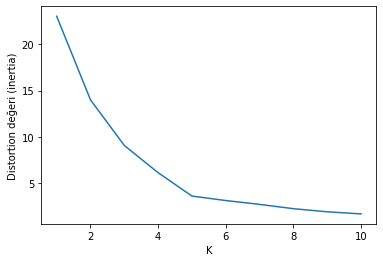

In [8]:
plt.xlabel("K")
plt.ylabel("Distortion değeri (inertia)")
plt.plot(range(1,11),list_dist)
plt.show()

In [9]:
#elbow yöntemi ile en iyi K degeri 5
#5 için KMeans modeli olusturalım

kmeans_modelim=KMeans(n_clusters=5)
y_pred=kmeans_modelim.fit_predict(df[["income","score"]])
y_pred

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [10]:
df["cluster"]=y_pred
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,4
1,2,0.000000,0.816327,1
2,3,0.008197,0.051020,4
3,4,0.008197,0.775510,1
4,5,0.016393,0.397959,4


In [11]:
#centroidleri (merkezleri) görelim
kmeans_modelim.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.08792846, 0.79962894],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432]])

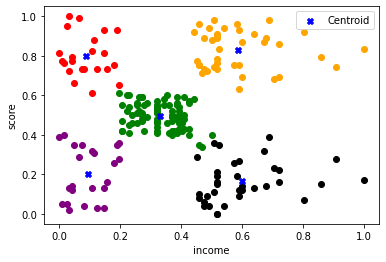

In [14]:
df1=df[df["cluster"]==0]
df2=df[df["cluster"]==1]
df3=df[df["cluster"]==2]
df4=df[df["cluster"]==3]
df5=df[df["cluster"]==4]

plt.xlabel("income")
plt.ylabel("score")
plt.scatter(df1["income"],df1["score"],color="green")
plt.scatter(df2["income"],df2["score"],color="red")
plt.scatter(df3["income"],df3["score"],color="black")
plt.scatter(df4["income"],df4["score"],color="orange")
plt.scatter(df5["income"],df5["score"],color="purple")

plt.scatter(kmeans_modelim.cluster_centers_[:,0],kmeans_modelim.cluster_centers_[:,1],color="blue",marker="X",label="Centroid")
plt.legend()
plt.show()